In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('dataset').extractall('dataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.0 MB/s eta 0:00:00


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# set the path to your tomato leaf dataset folder
data_dir = 'dataset'

# set the path to the folder where you want to save the split datasets
split_dir = 'dataset'

# create the train and test directories
train_dir = os.path.join(split_dir, 'train')
test_dir = os.path.join(split_dir, 'test')
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# loop through the classes in your dataset folder
classes = os.listdir(data_dir)
for class_name in classes:
    # create the train and test directories for this class
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    if not os.path.exists(train_class_dir):
        os.makedirs(train_class_dir)
    if not os.path.exists(test_class_dir):
        os.makedirs(test_class_dir)

    # get the file names for this class
    class_dir = os.path.join(data_dir, class_name)
    file_names = os.listdir(class_dir)

    # split the file names into training and testing sets
    train_files, test_files = train_test_split(file_names, test_size=0.2, random_state=42)

    # copy the training files to the train directory
    for file_name in train_files:
        src_file = os.path.join(class_dir, file_name)
        dst_file = os.path.join(train_class_dir, file_name)
        shutil.copy(src_file, dst_file)

    # copy the testing files to the test directory
    for file_name in test_files:
        src_file = os.path.join(class_dir, file_name)
        dst_file = os.path.join(test_class_dir, file_name)
        shutil.copy(src_file, dst_file)

In [4]:
#Intialization of Program. by Importing various LIbraries
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Convolution2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [5]:
for types in os.listdir("datasets/train/"):
    print(str(len(os.listdir("datasets/train/"+ types)))+" "+ types+' images')

199 Tomato_Bacterial_spot images
197 Tomato_Early_blight images
197 Tomato_healthy images
200 Tomato_Late_blight images
200 Tomato_Leaf_Mold images
195 Tomato_Septoria_leaf_spot images
192 Tomato_Spider_mites_Two_spotted_spider_mite images
194 Tomato__Target_Spot images
196 Tomato__Tomato_mosaic_virus images
199 Tomato__Tomato_YellowLeaf__Curl_Virus images


In [6]:
# Complete Dataset images can be loaded using ImageDataGenerator function
img_size=100
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("datasets/train/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory("/datasets/test/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

Found 1969 images belonging to 10 classes.
Found 1006 images belonging to 10 classes.


In [7]:
base_model = tf.keras.applications.VGG16(input_shape=(100,100,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model1 = tf.keras.Sequential([
                              base_model,
                              tf.keras.layers.GlobalMaxPooling2D(),
                              tf.keras.layers.Dense(4096, activation = 'relu'),
                              tf.keras.layers.Dropout(rate=0.5),
                              tf.keras.layers.Dense(10, activation='softmax')
                            ])


58889256/58889256 [==============================] - 0s 0us/step


In [17]:
model1.compile(
  optimizer="adam",
  loss = "categorical_crossentropy",)

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 4096)              2101248   
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                40970     
                                                                 
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
____________________________________

In [19]:
from keras.preprocessing.image import ImageDataGenerator
ephocs=2
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
model1.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)
model1.save('Tomato_Disease_Detection.h5')

Epoch 1/2
30/30 [==============================] - 386s 13s/step - loss: 16.2825 - val_loss: 4.2706
Epoch 2/2
30/30 [==============================] - 384s 13s/step - loss: 4.4233 - val_loss: 2.0778


1/1 [==============================] - 1s 1s/step


'Tomato_Early_blight'

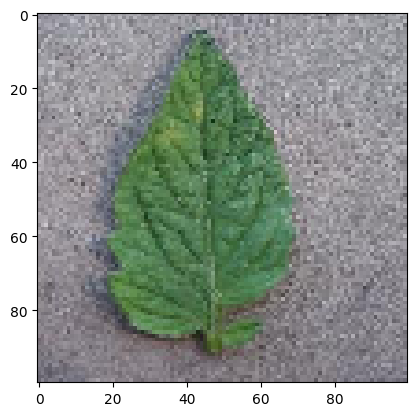

In [20]:
from tensorflow.keras.models import load_model
Detection=load_model('Tomato_Disease_Detection.h5')
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
test_img=image.load_img("datasets/train/Tomato_Leaf_Mold/0c0debed-e807-4236-a2e3-d9b72f54367f___Crnl_L.Mold 6899.JPG",target_size=(100,100))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=Detection.predict(test_img)
a=result.argmax()
# print('a:',a)
classes=train_generator.class_indices
# print(classes)
# print(len(classes))
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
          if(i==a):
              output=category[i]
output 

In [21]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=15cbf31b66435e7b8d750fa630e00abf318365a3e9d436ddad0a50ee9c7a3758
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [22]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [23]:
from skimage import io
import skimage
from tensorflow.keras.preprocessing import image
url = 'https://www.gardeningknowhow.com/wp-content/uploads/2011/07/septoria-leaf-spot2.jpg'
def read_and_transform_img(url):
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img
images = read_and_transform_img(url)

In [25]:
explanation = explainer.explain_instance(images[0].astype('double'), model1.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


(-0.5, 99.5, 99.5, -0.5)

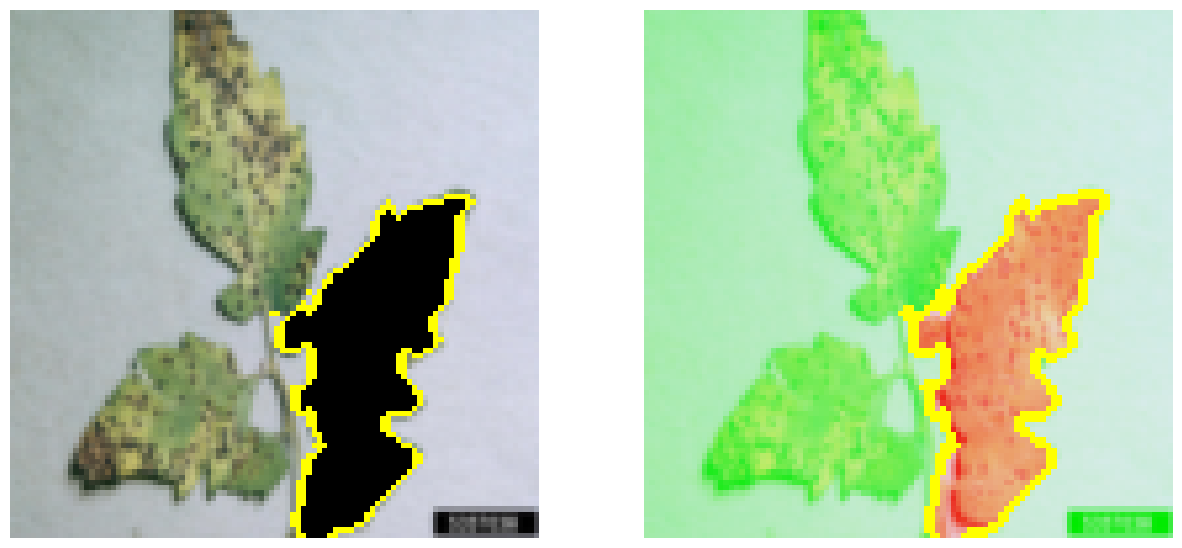

In [26]:
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

1/1 [==============================] - 0s 302ms/step


'Tomato_Late_blight'

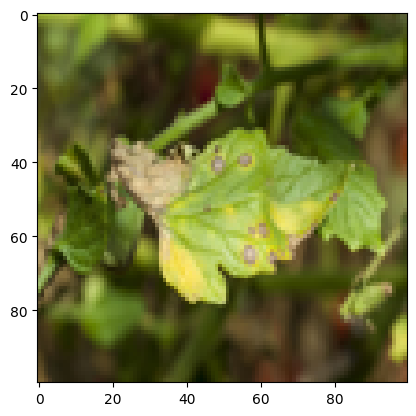

In [27]:
from PIL import Image
import urllib.request
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

Detection=load_model('Tomato_Disease_Detection.h5') 

url = 'https://www.openaccessgovernment.org/wp-content/uploads/2019/12/dreamstime_s_83237974-696x464.jpg'
with urllib.request.urlopen(url) as url_file:
    img = Image.open(url_file)
    img = img.convert('RGB')

test_img = img.resize((100,100))

plt.imshow(test_img) 

test_img=image.img_to_array(test_img) 
test_img=np.expand_dims(test_img,axis=0) 
result=Detection.predict(test_img) 
a=result.argmax() 

classes=train_generator.class_indices 
category=[] 
for i in classes: 
          category.append(i) 
for i in range(len(classes)): 
          if(i==a): 
              output=category[i] 
output

In [29]:
model1.save(filepath="save_model/")

In [30]:
converter = tf.lite.TFLiteConverter.from_saved_model('save_model')
tflite_model = converter.convert()
open("riceapp.tflite", "wb").write(tflite_model)

67438100